# Dataset in [channel*BS, Height, Weight] Format

In [1]:
%load_ext autoreload
%autoreload 2

import gzip
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_array_almost_equal

import torch

from Utils.data_class import mnist_dataset, noisify
from Utils.data_class import multiclass_noisify, noisify_pairflip, noisify_multiclass_symmetric, noisify_asymmetric, noisify_pairflip_permutation


In [2]:
data_path_original = './data/mnist/'

# Upload original images with thier labels, and annotators

In [3]:
with gzip.open(data_path_original + 'train-images-idx3-ubyte.gz', "rb") as a_file:
    original_img = idx2numpy.convert_from_file(a_file)
with gzip.open(data_path_original + 'train-labels-idx1-ubyte.gz', "rb") as a_file:
    labels = idx2numpy.convert_from_file(a_file)
with gzip.open(data_path_original + 'annotators_ubyte.gz', "rb") as a_file:
    annotators = idx2numpy.convert_from_file(a_file)

print("Shape of image data", original_img.shape, ", meaning 60 000 images with 28x28 pixels")
print("Shape of labels", labels.shape, ", meaning 60 000 labels")
print("Shape of annotators data", annotators.shape, ", meaning 5 annotations for 60 000 images with 28x28 pixels")

Shape of image data (60000, 28, 28) , meaning 60 000 images with 28x28 pixels
Shape of labels (60000,) , meaning 60 000 labels
Shape of annotators data (5, 60000, 28, 28) , meaning 5 annotations for 60 000 images with 28x28 pixels


### Plot the data from origin

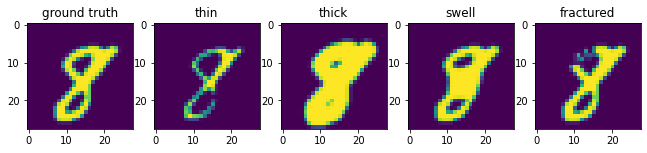

The label is 8


In [4]:
columns = 5
rows = 1
idx = 55

names = ["ground truth", "thin", "thick", "swell", "fractured"]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(columns*rows):
    annotator = annotators[i,idx,:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

label = labels[idx]
print("The label is", label)

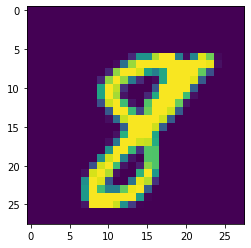

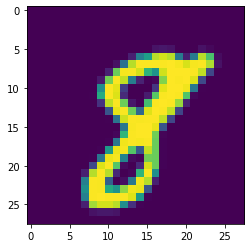

In [5]:
### the first annotator ("ground truth") suppose to be very close to the original image. Checking by comparing
sum(annotators[0,idx,:,:]==original_img[idx,:,:])
plt.imshow(original_img[idx,:,:]); plt.show()
plt.imshow(annotators[0,idx,:,:])

# Creating Noisy labels for each Anootators

In [6]:
### Labels: Annotator 1
gt_noisy_lbl, SM_ann1_gt = noisify(torch.tensor(labels), noise_type='symmetric', noise_rate=0.8, random_state=0, nb_classes=10)
ann1_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann1_thin = noisify(torch.tensor(labels), noise_type='asymmetric', noise_rate=0.4, random_state=0, nb_classes=10)
ann1_lbl = np.vstack((ann1_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann1_thick = noisify(torch.tensor(labels), noise_type='pairflip', noise_rate=0.95, random_state=0, nb_classes=10)
ann1_lbl = np.vstack((ann1_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(labels),noise=0.2,random_state=0,nb_classes=10)
# ann1_lbl = np.vstack((ann1_lbl, swell_noisy_lbl))

# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(labels), noise=0.6, random_state=0, nb_classes=10)
# ann1_lbl = np.vstack((ann1_lbl, frac_noisy_lbl))

print(ann1_lbl.shape)

(3, 60000)


/tmp/ipykernel_133384/3316278993.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


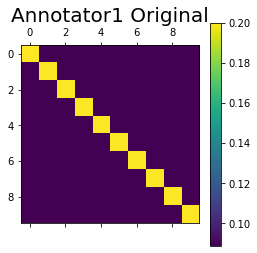

In [7]:
plt.matshow(SM_ann1_gt);plt.colorbar();
plt.title("Annotator1 Original", fontsize = 20);
plt.tight_layout()
plt.savefig('./plots/Original_SMs/SM_ann1_gt.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/2227806512.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


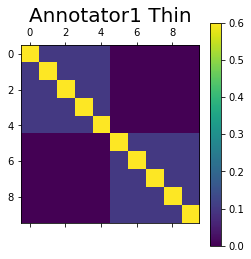

In [8]:
plt.matshow(SM_ann1_thin);plt.colorbar();
plt.title("Annotator1 Thin", fontsize = 20);
plt.tight_layout()
plt.savefig('./plots/Original_SMs/SM_ann1_thin.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/4092862345.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


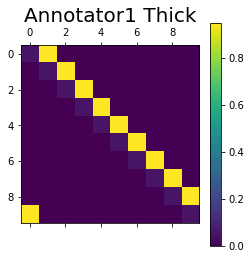

In [9]:
plt.matshow(SM_ann1_thick);plt.colorbar();
plt.title("Annotator1 Thick", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann1_thick.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/3624960161.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


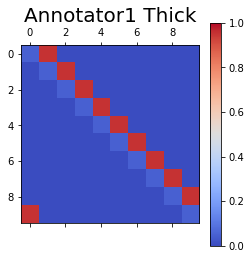

In [10]:
### can use different cmap colors
plt.matshow(SM_ann1_thick, cmap='coolwarm', vmin = 0, vmax =1);plt.colorbar();
# plt.matshow(SM_ann1_thick, cmap='jet', vmin = 0, vmax =1);plt.colorbar();  #Spectral
plt.title("Annotator1 Thick", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann1_thick.pdf', bbox_inches='tight')

In [11]:
### Labels: Annotator 2
gt_noisy_lbl, SM_ann2_gt = noisify(torch.tensor(labels), noise_type='pairflip_permut', noise_rate=0.4, random_state=0, nb_classes=10)
ann2_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann2_thin = noisify(torch.tensor(labels), noise_type='symmetric', noise_rate=0.95, random_state=0, nb_classes=10)
ann2_lbl = np.vstack((ann2_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann2_thick = noisify(torch.tensor(labels), noise_type='asymmetric', noise_rate=0.7, random_state=0, nb_classes=10)
ann2_lbl = np.vstack((ann2_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(annotators_labels),noise=0.4,random_state=0,nb_classes=10)
# ann2_lbl = np.vstack((ann2_lbl, swell_noisy_lbl))

# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(annotators_labels), noise=0.4, random_state=0, nb_classes=10)
# ann2_lbl = np.vstack((ann2_lbl, frac_noisy_lbl))

print(ann2_lbl.shape)

(4, 1, 2, 7, 5, 0, 3, 6, 8, 9) 0
(3, 60000)


/tmp/ipykernel_133384/1410996711.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


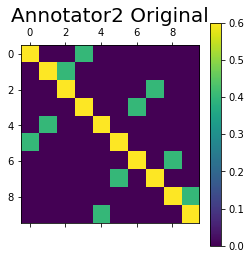

In [12]:
plt.matshow(SM_ann2_gt);plt.colorbar();
plt.title("Annotator2 Original", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann2_gt.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/3167649102.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


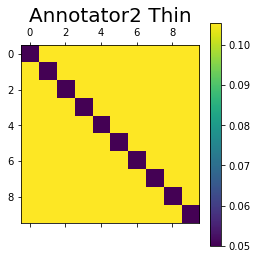

In [13]:
plt.matshow(SM_ann2_thin);plt.colorbar();
plt.title("Annotator2 Thin", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann2_thin.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/1491671235.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


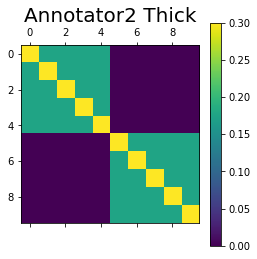

In [14]:
plt.matshow(SM_ann2_thick);plt.colorbar();
plt.title("Annotator2 Thick", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann2_thick.pdf', bbox_inches='tight')

In [15]:
### Labels: Annotator 3
gt_noisy_lbl, SM_ann3_gt = noisify(torch.tensor(labels), noise_type='pairflip', noise_rate=0.6, random_state=0, nb_classes=10)
ann3_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann3_thin = noisify(torch.tensor(labels), noise_type='pairflip_permut', noise_rate=0.4, random_state=5, nb_classes=10)
ann3_lbl = np.vstack((ann3_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann3_thick = noisify(torch.tensor(labels), noise_type='symmetric', noise_rate=0.8, random_state=0, nb_classes=10)
ann3_lbl = np.vstack((ann3_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(annotators_labels),noise=0.6,random_state=0,nb_classes=10)
# ann3_lbl = np.vstack((ann3_lbl, swell_noisy_lbl))
# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(annotators_labels), noise=0.5, random_state=0, nb_classes=10)
# ann3_lbl = np.vstack((ann3_lbl, frac_noisy_lbl))

print(ann3_lbl.shape)

(4, 1, 2, 7, 5, 0, 3, 9, 8, 6) 5
(3, 60000)


/tmp/ipykernel_133384/1467343561.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


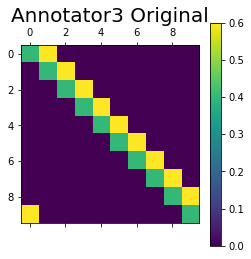

In [16]:
plt.matshow(SM_ann3_gt);plt.colorbar();
plt.title("Annotator3 Original", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann3_gt.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/3577558922.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


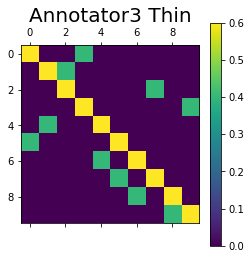

In [17]:
plt.matshow(SM_ann3_thin);plt.colorbar();
plt.title("Annotator3 Thin", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann3_thin.pdf', bbox_inches='tight')

/tmp/ipykernel_133384/88468872.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


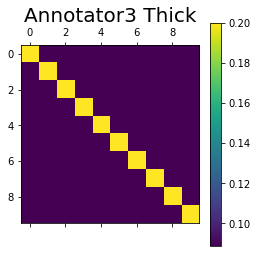

In [18]:
plt.matshow(SM_ann3_thick);plt.colorbar();
plt.title("Annotator3 Thick", fontsize = 20);
plt.tight_layout()
# plt.savefig('./plots/Original_SMs/SM_ann3_thick.pdf', bbox_inches='tight')

In [19]:
gt_lbl = labels
for i in range (1, 3):
    gt_lbl = np.vstack((gt_lbl, labels)) 

print(gt_lbl.shape)

(3, 60000)


In [20]:
all_ann_labels = [ann1_lbl, ann2_lbl, ann3_lbl]

# For whole train data (no splitting into train & validation)

In [21]:
print(annotators[0,:].sum())
print(original_img.sum())

1572527984
1567298545


(3, 60000, 28, 28)
7 7 7
1 7 8
5 7 8
7 7 1


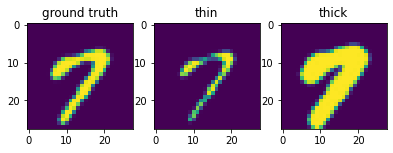

In [22]:
# using only first three annotators: gt, thin, thick
images = annotators[0:3, :]
print(images.shape)

### Reshaping the data
train_img = images.reshape(3 * 60000, 28, 28)

gt_train_lbl = gt_lbl.reshape(3*60000)
ann1_train_lbl = ann1_lbl.reshape(3*60000)
ann2_train_lbl = ann2_lbl.reshape(3*60000)
ann3_train_lbl = ann3_lbl.reshape(3*60000)

idx = 15; idx2 = 60000+idx; idx3 = 120000+idx
print(gt_train_lbl[idx], gt_train_lbl[idx2], gt_train_lbl[idx3])
print(ann1_train_lbl[idx], ann1_train_lbl[idx2], ann1_train_lbl[idx3])
print(ann2_train_lbl[idx], ann2_train_lbl[idx2], ann2_train_lbl[idx3])
print(ann3_train_lbl[idx], ann3_train_lbl[idx2], ann3_train_lbl[idx3])

index = [i + idx for i in range(0,180000,60000)]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(3):
    annotator = train_img [index[i],:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

### saving the training and validation dataset in npy format
np.save(data_path_original + 'train_whole/' + 'train_data', train_img)
np.save(data_path_original + 'train_whole/' + 'train_gt_labels', gt_train_lbl)
np.save(data_path_original + 'train_whole/' + 'train_ann1_labels', ann1_train_lbl)
np.save(data_path_original + 'train_whole/' + 'train_ann2_labels', ann2_train_lbl)
np.save(data_path_original + 'train_whole/' + 'train_ann3_labels', ann3_train_lbl)

(180000, 28, 28)


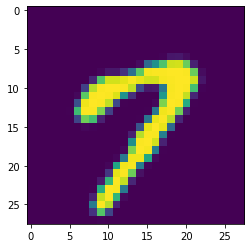

In [23]:
images_train_whole = np.load('data/mnist/train_whole/train_data.npy')
print(images_train_whole.shape)
plt.imshow(images_train_whole[idx])

# Splitting data: train (first 50 000 images) & validation (last 10 000 images)

## Splitting Data

In [24]:
### similarly, using here only first 3 annotations: gt, thin, thick 
images = annotators[0:3,:]

### splitting images
dataset_split = np.array_split(images, [50000, 60000], axis=1)
train_img = dataset_split[0]
val_img = dataset_split[1]
print("Training vs Validation data(image) shapes", train_img.shape, val_img.shape)

### splitting GT labels
label_split = np.array_split(gt_lbl, [50000,60000], axis=1)
train_lbl = label_split[0]
val_lbl = label_split[1]
print("Training vs Validation labels shapes", train_lbl.shape, val_lbl.shape)

### splitting annotators
for lbl in all_ann_labels:
    split = np.array_split(lbl, [50000, 60000], axis=1)
    train_lbl = np.vstack((train_lbl, split[0])) 
    val_lbl = np.vstack((val_lbl, split[1]))
print("\nAnnotation label shapes", train_lbl.shape, val_lbl.shape)

### defining the each annotators labels
gt_train_lbl = train_lbl[0:3]
ann1_train_lbl = train_lbl[3:6]
ann2_train_lbl = train_lbl[6:9]
ann3_train_lbl = train_lbl[9:12]

gt_val_lbl = val_lbl[0:3]
ann1_val_lbl = val_lbl[3:6]
ann2_val_lbl = val_lbl[6:9]
ann3_val_lbl = val_lbl[9:12]

print("\nTraining annotators shapes", gt_train_lbl.shape, ann1_train_lbl.shape, ann2_train_lbl.shape, ann3_train_lbl.shape)
print("Validation annotators shapes",gt_val_lbl.shape, ann1_val_lbl.shape, ann2_val_lbl.shape, ann3_val_lbl.shape)

Training vs Validation data(image) shapes (3, 50000, 28, 28) (3, 10000, 28, 28)
Training vs Validation labels shapes (3, 50000) (3, 10000)

Annotation label shapes (12, 50000) (12, 10000)

Training annotators shapes (3, 50000) (3, 50000) (3, 50000) (3, 50000)
Validation annotators shapes (3, 10000) (3, 10000) (3, 10000) (3, 10000)


### Reshaping the data

7 7 5
1 7 7
5 7 0
7 7 6


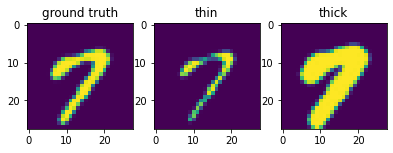

In [25]:
train_img = train_img.reshape(3*50000,28,28)
val_img = val_img.reshape(3*10000,28,28)

gt_train_lbl = gt_train_lbl.reshape(3*50000)
ann1_train_lbl = ann1_train_lbl.reshape(3*50000)
ann2_train_lbl = ann2_train_lbl.reshape(3*50000)
ann3_train_lbl = ann3_train_lbl.reshape(3*50000)

gt_val_lbl = gt_val_lbl.reshape(3*10000)
ann1_val_lbl = ann1_val_lbl.reshape(3*10000)
ann2_val_lbl = ann2_val_lbl.reshape(3*10000)
ann3_val_lbl = ann3_val_lbl.reshape(3*10000)

idx = 15; idx2 = 50000+idx; idx3 = 10000+idx
print(gt_train_lbl[idx], gt_train_lbl[idx2], gt_train_lbl[idx3])
print(ann1_train_lbl[idx], ann1_train_lbl[idx2], ann1_train_lbl[idx3])
print(ann2_train_lbl[idx], ann2_train_lbl[idx2], ann2_train_lbl[idx3])
print(ann3_train_lbl[idx], ann3_train_lbl[idx2], ann3_train_lbl[idx3])


index = [i + idx for i in range(0,150000,50000)]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(3):
    annotator = train_img [index[i],:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

### Plotting data from the training data set

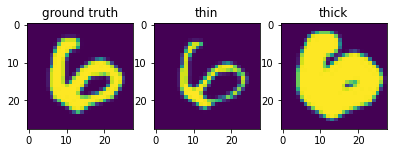

The label is 6 3 8 7


In [26]:
### Plotting data from the training data set
idx = 9000

index = [i + idx for i in range(0,150000,50000)]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(3):
    annotator = train_img [index[i],:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

gt_label = gt_train_lbl[idx]
ann1_label = ann1_train_lbl[idx]
ann2_label = ann2_train_lbl[idx]
ann3_label = ann3_train_lbl[idx]
print("The label is", gt_label, ann1_label, ann2_label, ann3_label)

### Plotting data from the validation data set

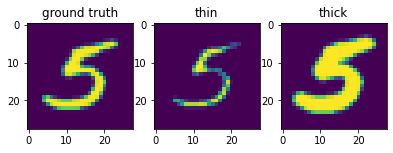

The label is 5 0 5 5


In [27]:
### Plotting data from the validation data set
idx = 9002
index = [i + idx for i in range(0,30000,10000)]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(3):
    annotator = val_img [index[i],:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()


gt_label = gt_val_lbl[idx]
ann1_label = ann1_val_lbl[idx]
ann2_label = ann2_val_lbl[idx]
ann3_label = ann3_val_lbl[idx]
print("The label is", gt_label, ann1_label, ann2_label, ann3_label)

In [28]:
### saving the training and validation dataset in npy format
np.save(data_path_original + 'train/' + 'train_data', train_img)
np.save(data_path_original + 'train/' + 'train_gt_labels', gt_train_lbl)
np.save(data_path_original + 'train/' + 'train_ann1_labels', ann1_train_lbl)
np.save(data_path_original + 'train/' + 'train_ann2_labels', ann2_train_lbl)
np.save(data_path_original + 'train/' + 'train_ann3_labels', ann3_train_lbl)

np.save(data_path_original + 'val/' + 'val_data', val_img)
np.save(data_path_original + 'val/' + 'val_gt_labels', gt_val_lbl)
np.save(data_path_original + 'val/' + 'val_ann1_labels', ann1_val_lbl)
np.save(data_path_original + 'val/' + 'val_ann2_labels', ann2_val_lbl)
np.save(data_path_original + 'val/' + 'val_ann3_labels', ann3_val_lbl)

In [29]:
from torchvision import transforms

img = train_img[5,:,:]
print(img.shape)
tr1 = transforms.ToTensor()
img = tr1(img)
print(img.shape)
tr2 = transforms.Resize((32,32))
img = tr2(img)
print(img.shape, img.mean())
tr3 = transforms.Normalize((0.1307,), (0.3081,))
img = tr3(img)
print(img.shape, img.mean())
img = torch.squeeze(img, dim=0)
print(img.shape)

(28, 28)
torch.Size([1, 28, 28])
torch.Size([1, 32, 32]) tensor(0.1493)
torch.Size([1, 32, 32]) tensor(0.0604)
torch.Size([32, 32])


# Dataset class

In [30]:
images = np.load('data/mnist/train/train_data.npy')
gt_labels = np.load('data/mnist/train/train_gt_labels.npy')
ann1_labels = np.load('data/mnist/train/train_ann1_labels.npy')
ann2_labels = np.load('data/mnist/train/train_ann2_labels.npy')
ann3_labels = np.load('data/mnist/train/train_ann3_labels.npy')
print(images.shape, gt_labels.shape, ann1_labels.shape, ann2_labels.shape, ann3_labels.shape )

(150000, 28, 28) (150000,) (150000,) (150000,) (150000,)


In [31]:
# def transform_target(label):
#     label = np.array(label)
#     target = torch.from_numpy(label).long()
#     return target  

In [32]:
import torch.utils.data as Data
from PIL import Image
from torchvision import transforms

class mnist_dataset(Data.Dataset):
    def __init__(self, train=True, transform=None, random_seed=1):
            
        self.transform = transform
        self.train = train 
        
        self.images_train = np.load('data/mnist/train/train_data.npy')
        self.gt_labels_train = np.load('data/mnist/train/train_gt_labels.npy')
        self.ann1_labels_train = np.load('data/mnist/train/train_ann1_labels.npy')
        self.ann2_labels_train = np.load('data/mnist/train/train_ann2_labels.npy')
        self.ann3_labels_train = np.load('data/mnist/train/train_ann3_labels.npy')
        
        self.images_val = np.load('data/mnist/val/val_data.npy')
        self.gt_labels_val = np.load('data/mnist/val/val_gt_labels.npy')
        self.ann1_labels_val = np.load('data/mnist/val/val_ann1_labels.npy')
        self.ann2_labels_val = np.load('data/mnist/val/val_ann2_labels.npy')
        self.ann3_labels_val = np.load('data/mnist/val/val_ann3_labels.npy')

    
    def __getitem__(self, index):
        transform_train = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((32,32)),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        
        tr = transforms.ToTensor()
        
        if self.train:
            if self.transform:
                img = transform_train(self.images_train[index,:,:])
            else:
                img = tr(self.images_train[index,:,:])
                
            gt_lbl = self.gt_labels_train[index]
            ann1_lbl = self.ann1_labels_train[index]
            ann2_lbl = self.ann2_labels_train[index]
            ann3_lbl = self.ann3_labels_train[index]

        else:
            if self.transform:
                img = transform_train(self.images_val[index,:,:])
            else:
                img = tr(self.images_val[index,:,:])
                
            gt_lbl = self.gt_labels_val[index]
            ann1_lbl = self.ann1_labels_val[index]
            ann2_lbl = self.ann2_labels_val[index]
            ann3_lbl = self.ann3_labels_val[index]
            
#         img = Image.fromarray(img)       

        img = torch.squeeze(img, dim=0)
   
#         if self.target_transform is not None:
#             label = self.target_transform(label)
        
        return img, gt_lbl, ann1_lbl, ann2_lbl, ann3_lbl, index  
    
    def __len__(self):
        if self.train:
            return len(self.gt_labels_train)
        else:
            return len(self.gt_labels_val)
 

In [33]:
images_train = np.load('data/mnist/train/train_data.npy')

In [34]:
images_train.shape

(150000, 28, 28)

In [35]:
lll = next(iter(mnist_dataset()))
print(len(lll))
print(lll[0].shape)
print(lll[1])
print(lll[4])
print(torch.tensor(lll[4]))
lll[5]

6
torch.Size([28, 28])
5
6
tensor(6, dtype=torch.uint8)


0

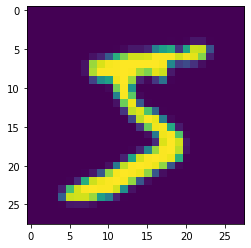

The label is 5 5 5 6 0


In [36]:
### Check manually
plt.imshow(lll[0]); plt.show()

gt_label = lll[1]
ann1_label = lll[2]
ann2_label = lll[3]
ann3_label = lll[4]
idx = lll[5]
print("The label is", gt_label, ann1_label, ann2_label, ann3_label, idx)

In [37]:
BATCH_SIZE = 128

train_dataset = mnist_dataset(train=True, transform = True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(len(train_loader), len(train_loader)*BATCH_SIZE)

val_dataset = mnist_dataset(train=False, transform = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(len(val_loader), len(val_loader)*BATCH_SIZE)

1172 150016
235 30080


torch.Size([128, 32, 32]) torch.Size([128]) torch.Size([128]) torch.Size([128]) torch.Size([128])


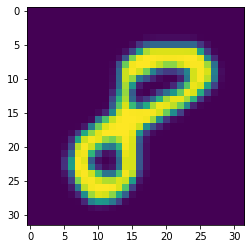

tensor(8, dtype=torch.uint8)
tensor(1, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)
tensor(3933)


NameError: name 'tyfret' is not defined

In [38]:
for data in val_loader:
    print(data[0].shape, data[1].shape, data[2].shape, data[3].shape, data[4].shape)
    idx = 59
    plt.imshow(data[0][idx]); plt.show()
    print(data[1][idx])
    print(data[2][idx])
    print(data[3][idx])
    print(data[4][idx])
    print(data[5][idx])
    tyfret

# Data Prep for Test Data

In [39]:
data_path_original = './data/mnist/test/'
with gzip.open(data_path_original + 'annotators_test_ubyte.gz', "rb") as a_file:
    annotators = idx2numpy.convert_from_file(a_file)
with gzip.open(data_path_original + 't10k-labels-idx1-ubyte.gz', "rb") as a_file:
    annotators_labels = idx2numpy.convert_from_file(a_file)

print("Shape of image data", annotators.shape)
print("Shape of labels", annotators_labels.shape)

Shape of image data (5, 10000, 28, 28)
Shape of labels (10000,)


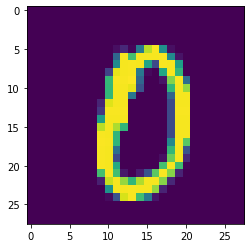

In [40]:
with gzip.open(data_path_original + 't10k-images-idx3-ubyte.gz', "rb") as a_file:
    img = idx2numpy.convert_from_file(a_file)
plt.imshow(img[55])

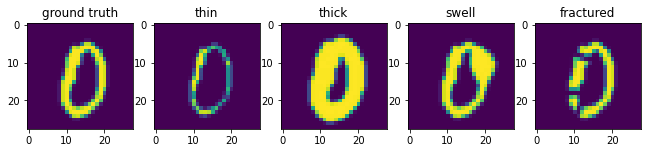

The label is 0


In [41]:
columns = 5
rows = 1
idx = 55

names = ["ground truth", "thin", "thick", "swell", "fractured"]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(columns*rows):
    annotator = annotators[i,idx,:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

label = annotators_labels[idx]
print("The label is", label)

In [42]:
### Labels: Annotator 1
gt_noisy_lbl, SM_ann1_gt_test = noisify(torch.tensor(annotators_labels), noise_type='symmetric', noise_rate=0.8, random_state=0, nb_classes=10)
ann1_test_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann1_thin_test = noisify(torch.tensor(annotators_labels), noise_type='asymmetric', noise_rate=0.4, random_state=0, nb_classes=10)
ann1_test_lbl = np.vstack((ann1_test_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann1_thick_test = noisify(torch.tensor(annotators_labels), noise_type='pairflip', noise_rate=0.95, random_state=0, nb_classes=10)
ann1_test_lbl = np.vstack((ann1_test_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(annotators_labels),noise=0.2,random_state=0,nb_classes=10)
# ann1_lbl = np.vstack((ann1_lbl, swell_noisy_lbl))

# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(annotators_labels), noise=0.6, random_state=0, nb_classes=10)
# ann1_lbl = np.vstack((ann1_lbl, frac_noisy_lbl))

print(ann1_test_lbl.shape)

(3, 10000)


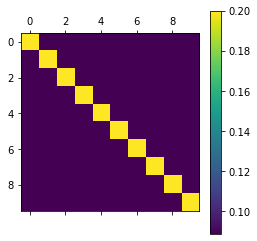

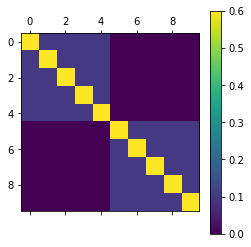

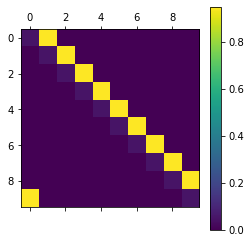

In [43]:
plt.matshow(SM_ann1_gt_test);plt.colorbar();
plt.matshow(SM_ann1_thin_test);plt.colorbar();
plt.matshow(SM_ann1_thick_test);plt.colorbar();
# plt.savefig('./plots/Original_SMs/SM_ann1_gt_test.png')

In [ ]:
plt.matshow(SM_ann1_gt);plt.colorbar();
plt.title("Annotator1 GT", fontsize = 20);
plt.tight_layout()
plt.savefig('./plots/Original_SMs/SM_ann1_gt.pdf', bbox_inches='tight')

plt.matshow(SM_ann1_thin);plt.colorbar();
plt.title("Annotator1 Thin", fontsize = 20);
plt.tight_layout()
plt.savefig('./plots/Original_SMs/SM_ann1_thin.pdf', bbox_inches='tight')

plt.matshow(SM_ann1_thick);plt.colorbar();
plt.title("Annotator1 Thick", fontsize = 20);
plt.tight_layout()
plt.savefig('./plots/Original_SMs/SM_ann1_thick.pdf', bbox_inches='tight')

In [51]:
### Labels: Annotator 2
gt_noisy_lbl, SM_ann2_gt_test = noisify(torch.tensor(annotators_labels), noise_type='pairflip_permut', noise_rate=0.4, random_state=0, nb_classes=10)
ann2_test_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann2_thin_test = noisify(torch.tensor(annotators_labels), noise_type='symmetric', noise_rate=0.95, random_state=0, nb_classes=10)
ann2_test_lbl = np.vstack((ann2_test_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann2_thick_test = noisify(torch.tensor(annotators_labels), noise_type='asymmetric', noise_rate=0.7, random_state=0, nb_classes=10)
ann2_test_lbl = np.vstack((ann2_test_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(annotators_labels),noise=0.4,random_state=0,nb_classes=10)
# ann2_lbl = np.vstack((ann2_lbl, swell_noisy_lbl))

# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(annotators_labels), noise=0.4, random_state=0, nb_classes=10)
# ann2_lbl = np.vstack((ann2_lbl, frac_noisy_lbl))

print(ann2_test_lbl.shape)

(4, 1, 2, 7, 5, 0, 3, 6, 8, 9) 0
(3, 10000)


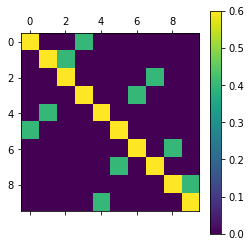

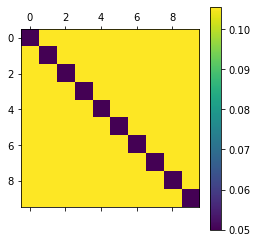

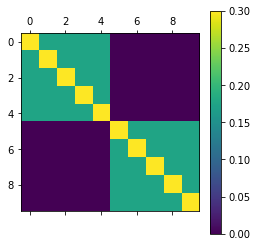

In [52]:
plt.matshow(SM_ann2_gt_test);plt.colorbar();
plt.matshow(SM_ann2_thin_test);plt.colorbar();
plt.matshow(SM_ann2_thick_test);plt.colorbar();

In [46]:
### Labels: Annotator 3
gt_noisy_lbl, SM_ann3_gt_test = noisify(torch.tensor(annotators_labels), noise_type='pairflip', noise_rate=0.6, random_state=0, nb_classes=10)
ann3_test_lbl = gt_noisy_lbl

thin_noisy_lbl, SM_ann3_thin_test = noisify(torch.tensor(annotators_labels), noise_type='pairflip_permut', noise_rate=0.4, random_state=5, nb_classes=10)
ann3_test_lbl = np.vstack((ann3_test_lbl, thin_noisy_lbl))

thick_noisy_lbl, SM_ann3_thick_test = noisify(torch.tensor(annotators_labels), noise_type='symmetric', noise_rate=0.8, random_state=0, nb_classes=10)
ann3_test_lbl = np.vstack((ann3_test_lbl, thick_noisy_lbl))

# swell_noisy_lbl = noisify_pairflip(torch.tensor(annotators_labels),noise=0.6,random_state=0,nb_classes=10)
# ann3_lbl = np.vstack((ann3_lbl, swell_noisy_lbl))
# frac_noisy_lbl = noisify_multiclass_symmetric(torch.tensor(annotators_labels), noise=0.5, random_state=0, nb_classes=10)
# ann3_lbl = np.vstack((ann3_lbl, frac_noisy_lbl))

print(ann3_test_lbl.shape)

(4, 1, 2, 7, 5, 0, 3, 9, 8, 6) 5
(3, 10000)


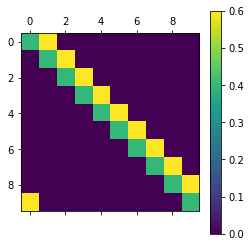

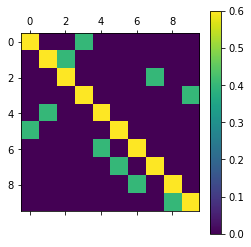

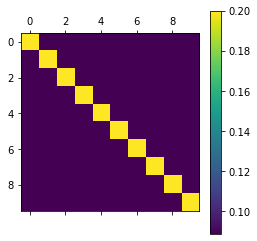

In [47]:
plt.matshow(SM_ann3_gt_test);plt.colorbar();
plt.matshow(SM_ann3_thin_test);plt.colorbar();
plt.matshow(SM_ann3_thick_test);plt.colorbar();

In [48]:
gt_test_lbl = annotators_labels
for i in range (1, 3):
    gt_test_lbl = np.vstack((gt_test_lbl, annotators_labels)) 

print(gt_test_lbl.shape)

(3, 10000)


5 5 5
9 5 6
5 7 8
5 5 9


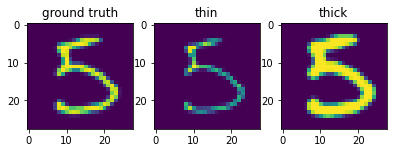

In [53]:
##### Reshaping the data
images = annotators[0:3,:]

test_img = images.reshape(3*10000,28,28)

gt_test_lbl = gt_test_lbl.reshape(3*10000)
ann1_test_lbl = ann1_test_lbl.reshape(3*10000)
ann2_test_lbl = ann2_test_lbl.reshape(3*10000)
ann3_test_lbl = ann3_test_lbl.reshape(3*10000)

idx = 15; idx2 = 10000+idx; idx3 = 20000+idx
print(gt_test_lbl[idx], gt_test_lbl[idx2], gt_test_lbl[idx3])
print(ann1_test_lbl[idx], ann1_test_lbl[idx2], ann1_test_lbl[idx3])
print(ann2_test_lbl[idx], ann2_test_lbl[idx2], ann2_test_lbl[idx3])
print(ann3_test_lbl[idx], ann3_test_lbl[idx2], ann3_test_lbl[idx3])


index = [i + idx for i in range(0,30000,10000)]

fig = plt.figure(figsize = (11, 15))
ax = []
for i in range(3):
    annotator = test_img [index[i],:,:]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title(names[i]) 
    plt.imshow(annotator)
plt.show()

In [54]:
##### saving the testing dataset in npy format
np.save(data_path_original + 'test_data', test_img)
np.save(data_path_original + 'test_gt_labels', gt_test_lbl)
np.save(data_path_original + 'test_ann1_labels', ann1_test_lbl)
np.save(data_path_original + 'test_ann2_labels', ann2_test_lbl)
np.save(data_path_original + 'test_ann3_labels', ann3_test_lbl)

In [55]:
##### Importing data and putting to loader
images_test = np.load('data/mnist/test/test_data.npy')
gt_test_labels = np.load('data/mnist/test/test_gt_labels.npy')
ann1_test_labels = np.load('data/mnist/test/test_ann1_labels.npy')
ann2_test_labels = np.load('data/mnist/test/test_ann2_labels.npy')
ann3_test_labels = np.load('data/mnist/test/test_ann3_labels.npy')
print(images_test.shape, gt_test_labels.shape, ann1_test_labels.shape, ann2_test_labels.shape, ann3_test_labels.shape )

(30000, 28, 28) (30000,) (30000,) (30000,) (30000,)


In [56]:
import torch.utils.data as Data
from PIL import Image
from torchvision import transforms

class mnist_test_dataset(Data.Dataset):
    def __init__(self, transform=None, random_seed=0):
            
        self.transform = transform
        
        self.images_test = np.load('data/mnist/test/test_data.npy')
        self.gt_labels_test = np.load('data/mnist/test/test_gt_labels.npy')
        self.ann1_labels_test = np.load('data/mnist/test/test_ann1_labels.npy')
        self.ann2_labels_test = np.load('data/mnist/test/test_ann2_labels.npy')
        self.ann3_labels_test = np.load('data/mnist/test/test_ann3_labels.npy')
        
    def __getitem__(self, index):
        transform_train = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((32,32)),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        
        tr = transforms.ToTensor()
        
        
        if self.transform:
            img = transform_train(self.images_test[index,:,:])
        else:
            img = tr(self.images_test[index,:,:])

        gt_lbl = self.gt_labels_test[index]
        ann1_lbl = self.ann1_labels_test[index]
        ann2_lbl = self.ann2_labels_test[index]
        ann3_lbl = self.ann3_labels_test[index]

        img = torch.squeeze(img, dim=0)
       
        return img, gt_lbl, ann1_lbl, ann2_lbl, ann3_lbl, index  
    
    def __len__(self):
        return len(self.gt_labels_test)
        
 

1172 150016
torch.Size([128, 32, 32]) torch.Size([128]) torch.Size([128]) torch.Size([128]) torch.Size([128])


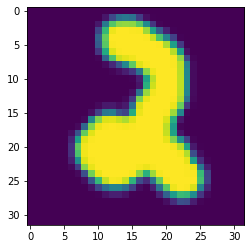

tensor(2, dtype=torch.uint8)
tensor(3, dtype=torch.uint8)
tensor(4, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(115466)


NameError: name 'tyfret' is not defined

In [57]:
BATCH_SIZE = 128
idx = 55

test_dataset = mnist_test_dataset(transform = True)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(len(test_loader), len(test_loader)*BATCH_SIZE)

for data in test_loader:
    print(data[0].shape, data[1].shape, data[2].shape, data[3].shape, data[4].shape)
    idx = 59
    plt.imshow(data[0][idx]); plt.show()
    print(data[1][idx])
    print(data[2][idx])
    print(data[3][idx])
    print(data[4][idx])
    print(data[5][idx])
    tyfret